In [ ]:
# Install necessary libraries run once in laptop, no need to run it again and again
!pip install transformers
!pip install datasets
!pip install torch
!pip install torchvision
!pip install PIL
!pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [ ]:
!kaggle datasets download -d adityajn105/flickr8k
#/content/captions.txt

Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0
flickr8k.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

zip_path = '/content/flickr8k.zip'  # Update with the path where your flickr8k.zip is located
extract_path = '/content/'  # Update with the path where you want to extract the files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, GPT2Tokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments
import torch
from torchvision import transforms
from PIL import Image
from tqdm import tqdm

# Define the model, tokenizer, and feature extractor
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:

# Load and preprocess images
def load_image(image_path):
    image = Image.open(image_path)
    return feature_extractor(images=image, return_tensors="pt").pixel_values

# Example image
image_path = '/content/Images/1009434119_febe49276a.jpg'  # Update with correct path
pixel_values = load_image(image_path)

# Generate caption
outputs = model.generate(pixel_values)
caption = tokenizer.decode(outputs[0], skip_special_tokens=True)


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


In [ ]:
!pip install transformers


In [ ]:
!pip install google-cloud-translate


In [ ]:
# Function to load translation model and tokenizer for Kannada
def load_translation_model_kn():
    model_name_kn = 'Helsinki-NLP/opus-mt-en-kn'
    translation_model_kn = MarianMTModel.from_pretrained(model_name_kn)
    translation_tokenizer_kn = MarianTokenizer.from_pretrained(model_name_kn)
    return translation_model_kn, translation_tokenizer_kn


In [ ]:
# Function to load translation model and tokenizer for Kannada (using an alternative model)
def load_translation_model_kn():
    model_name_kn = 'Helsinki-NLP/opus-mt-en-kn'  # Update with an accessible model name if available
    translation_model_kn = MarianMTModel.from_pretrained(model_name_kn)
    translation_tokenizer_kn = MarianTokenizer.from_pretrained(model_name_kn)
    return translation_model_kn, translation_tokenizer_kn


In [ ]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=516e6e6bcb98a0156b8cd540e7653f2599f71bcb3bcc14f8e36e2b2a5d308c56
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succ

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

Caption in English: a little girl standing next to a wooden bench 
Caption in Kannada: ಮರದ ಬೆಂಚ್ ಪಕ್ಕದಲ್ಲಿ ನಿಂತಿರುವ ಪುಟ್ಟ ಹುಡುಗಿ
Caption in Hindi: एक छोटी लड़की एक लकड़ी की बेंच के बगल में खड़ी है


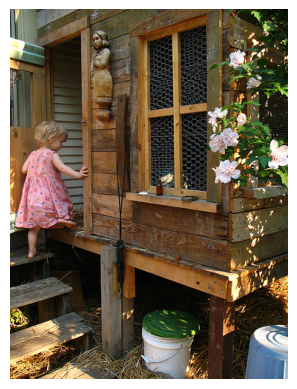

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, GPT2Tokenizer
from PIL import Image
import matplotlib.pyplot as plt
from googletrans import Translator

# Function to translate text to Kannada using Google Translate
def translate_to_kannada(text):
    translator = Translator()
    translated = translator.translate(text, src='en', dest='kn')
    return translated.text

# Function to translate text to Hindi using Google Translate
def translate_to_hindi(text):
    translator = Translator()
    translated = translator.translate(text, src='en', dest='hi')
    return translated.text

# Function to load the image and generate caption in English
def generate_caption(image_path):
    caption_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
    feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
    caption_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values

    # Generate caption
    outputs = caption_model.generate(pixel_values, max_length=16, num_beams=4, early_stopping=True)
    caption = caption_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return caption

# Example image path
image_path = '/content/Images/1000268201_693b08cb0e.jpg'  # Update with correct path

# Generate caption in English
caption = generate_caption(image_path)
print(f"Caption in English: {caption}")

# Translate caption to Kannada
translated_caption_kn = translate_to_kannada(caption)
print(f"Caption in Kannada: {translated_caption_kn}")

# Translate caption to Hindi
translated_caption_hi = translate_to_hindi(caption)
print(f"Caption in Hindi: {translated_caption_hi}")

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
pip install gtts


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

Caption in English: a little girl standing next to a wooden bench 
Caption in Kannada: ಮರದ ಬೆಂಚ್ ಪಕ್ಕದಲ್ಲಿ ನಿಂತಿರುವ ಪುಟ್ಟ ಹುಡುಗಿ
Caption in Hindi: एक छोटी लड़की एक लकड़ी की बेंच के बगल में खड़ी है


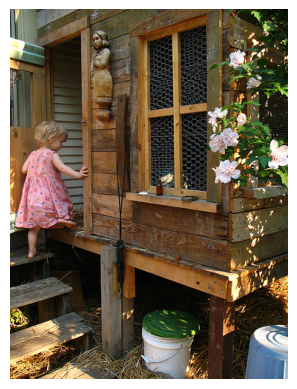

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, GPT2Tokenizer
from PIL import Image
import matplotlib.pyplot as plt
from googletrans import Translator
from gtts import gTTS
import IPython.display as ipd

# Function to translate text to Kannada using Google Translate
def translate_to_kannada(text):
    translator = Translator()
    translated = translator.translate(text, src='en', dest='kn')
    return translated.text

# Function to translate text to Hindi using Google Translate
def translate_to_hindi(text):
    translator = Translator()
    translated = translator.translate(text, src='en', dest='hi')
    return translated.text

# Function to convert text to speech
def text_to_speech(text, lang='en'):
    tts = gTTS(text=text, lang=lang, slow=False)
    tts.save("caption.mp3")
    return "caption.mp3"

# Function to load the image and generate caption in English
def generate_caption(image_path):
    caption_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
    feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
    caption_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values

    # Generate caption
    outputs = caption_model.generate(pixel_values, max_length=16, num_beams=4, early_stopping=True)
    caption = caption_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return caption

# Example image path
image_path = '/content/Images/1000268201_693b08cb0e.jpg'  # Update with correct path

# Generate caption in English
caption = generate_caption(image_path)
print(f"Caption in English: {caption}")

# Translate caption to Kannada
translated_caption_kn = translate_to_kannada(caption)
print(f"Caption in Kannada: {translated_caption_kn}")

# Translate caption to Hindi
translated_caption_hi = translate_to_hindi(caption)
print(f"Caption in Hindi: {translated_caption_hi}")

# Convert captions to speech and play them
audio_en = text_to_speech(caption, lang='en')
ipd.display(ipd.Audio(audio_en))

audio_kn = text_to_speech(translated_caption_kn, lang='kn')
ipd.display(ipd.Audio(audio_kn))

audio_hi = text_to_speech(translated_caption_hi, lang='hi')
ipd.display(ipd.Audio(audio_hi))

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()
